# Project 2 - creating neural net from scratch

The objective of this project is to design a mini “deep learning framework” using only pytorch’s tensor operations and the standard math library, hence in particular without using autograd or the neural-network modules.

Your framework should import only `torch.FloatTensor` and `torch.LongTensor` from pytorch, and use no pre-existing neural-network python toolbox.


-------------
# /////////////TODO/////////////

- start on the report
- create plot of decisionline with model and data as input (for better debugging and insight)
- create Relu()-module
- create proper MSEloss()-module
- create train_model() or similar
- create split_dataset() or similar
- create the net they request

-------------------------------------
-------------------------------------

In [1]:
# Definitely allowed imports
import math
import torch
from torch import FloatTensor, LongTensor, Tensor
# additional imports
import matplotlib.pyplot as plt


# our own written code
import helpers as HL

# jupyter magic
%load_ext autoreload
%autoreload 2

## Generate datasets

Generate a training and a test set of 1,000 points sampled uniformly in [0,1]2, each with a
label 0 if outside the disk of radius 1/ 2π and 1 inside,

torch.Size([1000, 2]) torch.Size([1000, 1])


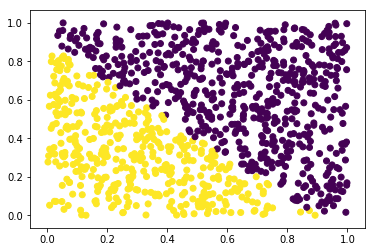

In [2]:

linear_inputs, linear_targets = HL.generate_linear_data()
print(linear_inputs.shape, linear_targets.shape)

# plot the data
plt.scatter(linear_inputs[:,0].numpy(), linear_inputs[:,1].numpy(), c=linear_targets.numpy())
plt.show()

torch.Size([1000, 2]) torch.Size([1000, 1])


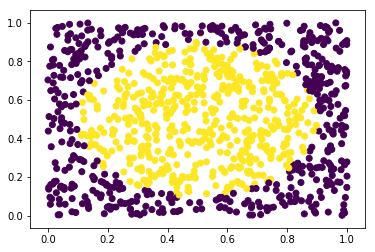

In [3]:
inputs, targets = HL.generate_disc_data(n=1000)
print(inputs.shape, targets.shape)

# plot the data
plt.scatter(inputs[:,0].numpy(), inputs[:,1].numpy(), c=targets.numpy())
plt.show()

## Build a network
...with `2` input units, `2` output units, `3` hidden layers of `25` units

Some modules may requires additional methods, and some modules may keep track of information
from the forward pass to be used in the backward.
You should implement at least the modules: `Linear` (fully connected layer), `ReLU` , `Tanh` , `Sequential`  to combine several modules in basic sequential structure, and LossMSE to compute the MSE loss.

# TESTING training

In [4]:
# generating data
inputs, targets = HL.generate_linear_data(n=1000)
print(inputs.shape, targets.shape)

nb_train_samples = inputs.size(0)
nb_classes = targets.size(1)
input_dim = inputs.size(1)
print("nb_train_samples: ",nb_train_samples)
print("nb_classes: ", nb_classes)
print("input_dim: ",input_dim)


# constants
learning_rate = 1e-1 / nb_train_samples
epsilon = 1e-6
epochs = 100


# define model and optimizer
model = HL.Linear_regression_model(input_dim=input_dim, output_dim=nb_classes)
print("model.parameters: ", model.param())
# define optimizer
sgd = HL.SGD(model.param(), lr=learning_rate)



# training in epochs

for epoch in range(epochs):

    # Back-prop

    acc_loss = 0
    nb_train_errors = 0
    
    #clear gradiants
    sgd.zero_grad()
    
    # iterate through samples and accumelate derivatives
    for n in range(0, nb_train_samples):
        output = model.forward(inputs[n])
        prediction = output.sign().add(1).div(2).abs()
        
        if int(targets[n]) != int(prediction) : nb_train_errors += 1
        acc_loss = acc_loss + HL.loss(output, targets[n])
        dl_dloss = HL.dloss(prediction, targets[n])
        #print(dl_dloss)
        
        #print("grad before: ", model.param()[0][0])
        model.backward(dl_dloss)
        #print("grad after: ", model.param()[0][0])
        
    # Gradient step 1.(outside loop with samples = GD) 2.(inside loop with samples = SGD)
    sgd.step()
    
    if epoch%(epochs/10) == 0:
        print("\nnb_train_errors: ", nb_train_errors)
        print("acc_loss: ", acc_loss)
    


torch.Size([1000, 2]) torch.Size([1000, 1])
nb_train_samples:  1000
nb_classes:  1
input_dim:  2
model.parameters:  [[(
1.00000e-06 *
 -0.3740  1.5298
[torch.FloatTensor of size 1x2]
, 
1.00000e-29 *
  0.0000  2.5244
[torch.FloatTensor of size 1x2]
), (
1.00000e-07 *
  4.7662
[torch.FloatTensor of size 1]
, 
 0
[torch.FloatTensor of size 1]
)], [(None, None)]]

nb_train_errors:  584
acc_loss:  415.9993268261185

nb_train_errors:  355
acc_loss:  450.0212163659744

nb_train_errors:  192
acc_loss:  414.7751788692549

nb_train_errors:  33
acc_loss:  390.20859484777793

nb_train_errors:  30
acc_loss:  389.58927000138465

nb_train_errors:  30
acc_loss:  389.6227598796304

nb_train_errors:  30
acc_loss:  389.4346629438678

nb_train_errors:  30
acc_loss:  389.4633059065345

nb_train_errors:  30
acc_loss:  389.49204163515424

nb_train_errors:  30
acc_loss:  389.2948969227964
